In [8]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import re
import string
from wordcloud import WordCloud, STOPWORDS
import matplotlib as plty
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words("english")
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [18]:
import matplotlib.pyplot as plt
from subprocess import check_output

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import plotly.graph_objs as go
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
vect = CountVectorizer()
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.manifold import TSNE
NB = MultinomialNB()
import os
print(os.listdir("C:\\Users\\maram\\Desktop\\prasad\\Data"))

['.ipynb_checkpoints', 'AI-in-ITSM.pdf', 'Clustering_in_Customer_Segmentation.pdf', 'CNN.pdf', 'Cognitive-Project-master.zip', 'Cusomer Segmentation', 'Customer segmentation.pdf', 'customer segmentation_ANOVA_811-E365.pdf', 'Deep Learning for Dummies-John Paul Mueller, Luca Massaron - Wiley (2019).pdf', 'ELU-2.pdf', 'ELU.pdf', 'ieee-fraud-detection.zip', 'ITSM_IMP_SCC2014_ticketAnalytics.pdf', 'latest_ticket_data.csv', 'LSTM.pdf', 'Mall Customers.csv', 'NLP_Sheet_1.csv', 'NLP_Sheet_2.csv', 'plot_kmeans_silhouette_analysis.ipynb', 'stories', 'stories.zip', 'tic_QA.pdf', 'uber-tikcet classificatin.pdf', 'Untitled.ipynb', 'Wholesale customers data.csv', 'xgboost_data.csv']


In [20]:
chatbot = pd.read_csv("C:\\Users\\maram\\Desktop\\prasad\\Data\\NLP_Sheet_1.csv",usecols=['response_id','class','response_text'],encoding='latin-1')
resume = pd.read_csv("C:\\Users\\maram\\Desktop\\prasad\\Data\\NLP_Sheet_2.csv",encoding='latin-1')

In [21]:
chatbot.head(5)

,response_id,class,response_text
0,response_1,not_flagged,I try and avoid this sort of conflict
1,response_2,flagged,Had a friend open up to me about his mental ad...
2,response_3,flagged,I saved a girl from suicide once. She was goin...
3,response_4,not_flagged,i cant think of one really...i think i may hav...
4,response_5,not_flagged,Only really one friend who doesn't fit into th...


In [22]:
chatbot['class'].value_counts()

not_flagged    55
flagged        25
Name: class, dtype: int64

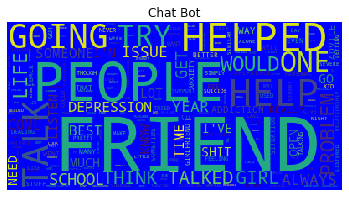

In [24]:
def cloud(text):
    wordcloud = WordCloud(background_color="blue",stopwords=stop).generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Chat Bot")
cloud(chatbot['response_text'])

In [25]:
chatbot['Label'] = Encode.fit_transform(chatbot['class'])

In [26]:
chatbot['Label'].value_counts()

1    55
0    25
Name: Label, dtype: int64

In [27]:
# Navie Bayes

x = chatbot.response_text
y = chatbot.Label
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)
NB.fit(x_train_dtm,y_train)
y_predict = NB.predict(x_test_dtm)
metrics.accuracy_score(y_test,y_predict)

0.7

In [28]:
# Random Forest
rf = RandomForestClassifier(max_depth=10,max_features=10)
rf.fit(x_train_dtm,y_train)
rf_predict = rf.predict(x_test_dtm)
metrics.accuracy_score(y_test,rf_predict)

0.8

In [29]:
Chatbot_Text = chatbot["response_text"]
len(Chatbot_Text)

80

In [30]:
Tf_idf = CountVectorizer(max_features=256).fit_transform(Chatbot_Text.values)

In [32]:
tsne = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=250,
    verbose=2,
    angle=0.5
).fit_transform(Tf_idf.toarray())

[t-SNE] Computing 79 nearest neighbors...
[t-SNE] Indexed 80 samples in 0.001s...
[t-SNE] Computed neighbors for 80 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 2.119037
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 104.8446655, gradient norm = 0.1529469 (50 iterations in 0.039s)
[t-SNE] Iteration 100: error = 125.6711197, gradient norm = 0.1274142 (50 iterations in 0.038s)
[t-SNE] Iteration 150: error = 128.4258728, gradient norm = 0.1097924 (50 iterations in 0.028s)
[t-SNE] Iteration 200: error = 145.1992950, gradient norm = 0.1119350 (50 iterations in 0.027s)
[t-SNE] Iteration 250: error = 139.9111328, gradient norm = 0.1110487 (50 iterations in 0.025s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 139.911133
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382